<a href="https://colab.research.google.com/github/leeesky/ML/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
# module

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

#dataset: 60,000
#size: 32*32

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


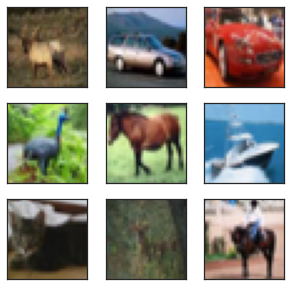

In [ ]:
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'hores', 'frog', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx): #enumerate: 
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[i+3])

plt.show()

In [ ]:
x_mean = np.mean(x_train_full, axis=(0,1,2))
x_std = np.std(x_train_full, axis=(0,1,2))
x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3)

In [ ]:
print(x_train.shape)
print(y_train.shape) 

print(x_val.shape)
print(y_val.shape) 

print(x_test.shape)
print(y_test.shape) 

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
def model_build():
    model = Sequential()
    input = Input(shape=(32,32,3))
    
    output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
    output = BatchNormalization()(output)
    #overfitting 방지
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    output = Dropout(0.5)(output)
    
    output = Flatten()(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='sparse_categorical_crossentropy',
                 metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
    #sparse_categorical_crossentropy loss 사용해서 complie하면 mertics에서 충돌
    
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256   

In [ ]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 26s 13ms/step - loss: 1.7491 - sparse_categorical_accuracy: 0.3826 - val_loss: 1.3213 - val_sparse_categorical_accuracy: 0.5275
Epoch 2/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.3202 - sparse_categorical_accuracy: 0.5233 - val_loss: 1.1295 - val_sparse_categorical_accuracy: 0.5971
Epoch 3/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.1614 - sparse_categorical_accuracy: 0.5882 - val_loss: 1.0205 - val_sparse_categorical_accuracy: 0.6377
Epoch 4/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.0494 - sparse_categorical_accuracy: 0.6247 - val_loss: 0.9660 - val_sparse_categorical_accuracy: 0.6565
Epoch 5/30
1094/1094 [==============================] - 14s 13ms/step - loss: 0.9695 - sparse_categorical_accuracy: 0.6549 - val_loss: 0.9177 - val_sparse_categorical_accuracy: 0.6699
Epoch 6/30
1094/1094 [==============================] - 14s 12ms/step - loss: 0.

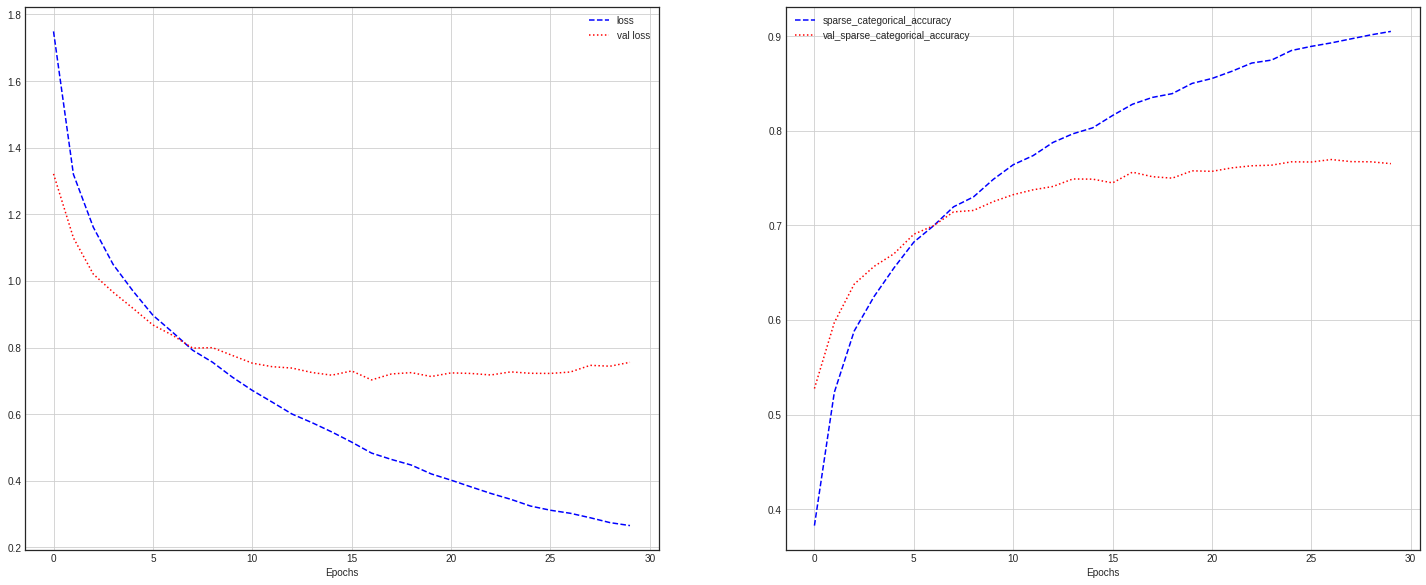

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r:', label='val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['sparse_categorical_accuracy'], 'b--', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], 'r:', label='val_sparse_categorical_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
def model_build():
    model = Sequential()
    input = Input(shape=(32,32,3))
    
    output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
    #overfitting 방지
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    output = Dropout(0.25)(output)
    
    output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    output = Dropout(0.25)(output)
    
    output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    output = Dropout(0.25)(output)
    
    output = Flatten()(output)
    output = Dropout(0.5)(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='sparse_categorical_crossentropy',
                 metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
    #sparse_categorical_crossentropy loss 사용해서 complie하면 mertics에서 충돌
    
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                       

In [ ]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - ETA: 0s - loss: 2.1714 - sparse_categorical_accuracy: 0.1949

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r:', label='val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['sparse_categorical_accuracy'], 'b--', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], 'r:', label='val_sparse_categorical_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()